# TITANIC SURVIVAL PREDICTION PROBLEM

In this notebook, I will use machine learning tools to solve Titanic survival prediction problem. The dataset can be accessed <a href="https://www.kaggle.com/c/titanic">here</a>

The goal is to build a predictive model based on information in the given training dataset to guess the survival of the passenger on the test dataset. This is a classficication problem, thus I will use machine learning algorithm best suited to solve classfication problem.

Since the question is already been defined, the workflow I will use are stated as following : 
1. Data Understanding
2. Data Preprocessing 
3. Exploratory Data Analysis (EDA)
4. Feature Selection & Engineering
5. Fit & Train Machine Learning Models 
6. Model Evaluation & Selection 
7. Result Submission

*But keep in mind that this workflow is only to give a general sense of direction, I might jump between steps if it's necessary since the process is iterative and closed-cycle.


In [1]:
#import libraries

#data analysis & preprocessing
import pandas as pd
import numpy as np 

#visualization tools 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Data Understanding 

Understanding the dataset is crucial first step in data science process because we can take a look at the dataset, determine its quality before we move into preprocessing.

In [2]:
#import the training and test dataset to panda dataframe
titanic_train = pd.read_csv("train.csv") 
titanic_test = pd.read_csv("test.csv")

#concatenate training and test dataset  into one dataframe
dataset = pd.concat([titanic_train, titanic_test])

#display first 5 rows of training and test dataset 
display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




Here we take a look at first 5 rows of the training dataset. It contains information about each passenger for each rows and different variable for each columns. We can group the variables :

Numerical

- Continuous : Age, Fare
- Discrete : SibSp, Parch

Categorical

- Ordinal : Pclass
- Nominal : PassengerId, Survived, Name, Sex, Ticket, Cabin, Embarked



From those columns, notice that some value are missing in the cabin columns. So we investigate further for the missing value in the dataset.



In [3]:
#overall description of dataframes, scanning for missing value 

display(titanic_train.info())
display(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

The training dataset comprises 891 rows and 12 columns, but there are missing data in age, cabin and embarked column. Meanwhile the test dataset also contain missing value in age, fare and cabin column.

Before we jump into handling the missing data, let's take a look on the overall statistics of each variable.

In [4]:
#overall view of the statistic of the variable

display(titanic_train.describe(include='all'))
display(titanic_test.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Attalah, Mr. Sleiman",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Franklin, Mr. Thomas Parham",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


We can observe some interesting insights such as : 
- The survival rate of passenger from training dataset is 38.38% 
- Majority of the passenger is male (843 out of 1309)
- Age contains several missing values in both training and test dataset, with a relative big standard variation.
- Cabin have a lot of missing values with only 295 out of 1309 data points, therefore the data is not complete and we might drop the whole column since it can't be considered as a feature in our predictive model.
- 1 missing value on fare column in test dataset.
- Embarked has just 2 missing values, we can fill the missing value with the most frequent data 'S'

## Data Preprocessing 

The missing data need to be addressed before we fit and train the data to the machine learning algorithm since it may impair the quality of the prediction.

This is an exciting steps since we can build some hypothesis on how to best fill the missing data since there are no the 'right' way to do it. For example, I'm going to take a look at the relation between Pclass, Sex and Age to fill the missing value for age.

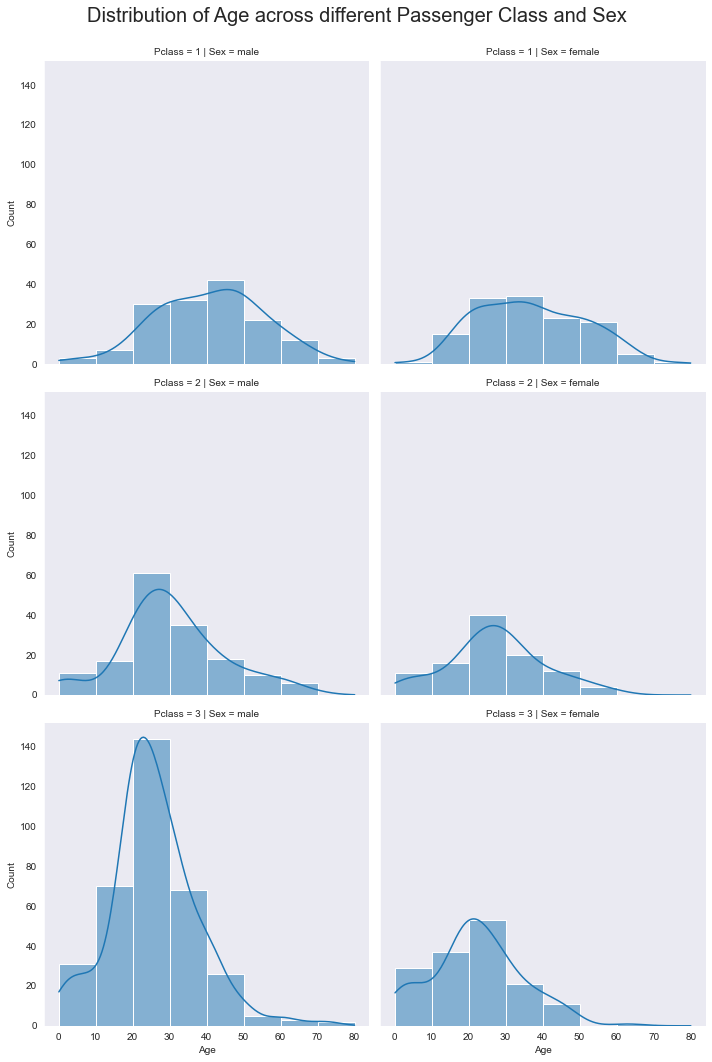

In [5]:
#subset new dataframe to observe the relation between Passenger Class, Sex and Age.

data_age_pclass_sex = dataset[['Pclass','Sex','Age']]

#visualizing the distribution of age across Passenger Class and Sex
sns.set_style('dark')

plot = sns.displot(data=data_age_pclass_sex, x='Age', col='Sex',row='Pclass', kde=True, bins=8)
plot.fig.suptitle("Distribution of Age across different Passenger Class and Sex", fontsize=20)
plot.fig.subplots_adjust(top=0.93)

In [6]:
#Calculate the median age for each Passenger class and sex group

fill_age_median = pd.DataFrame(data_age_pclass_sex.groupby(['Pclass','Sex'], as_index=False)['Age'].median())
fill_age_median

,Pclass,Sex,Age
0,1,female,36.0
1,1,male,42.0
2,2,female,28.0
3,2,male,29.5
4,3,female,22.0
5,3,male,25.0


We saw different type of distribution and median across age and passenger class, therefore we need to fill the missing age value accordingly.


Note that we use the age median value from the combination of both training and test since it contains missing value in both dataframes, so it makes more sense to consider the whole dataset

In [7]:
#fill missing value according to Passenger class and Sex 

print('For Training Dataset')
print('Before, there are ' + str(titanic_train['Age'].isnull().sum()) + ' missing values in "Age" column')

#fill missing value 
for pclass in fill_age_median['Pclass'].unique():
    for sex in fill_age_median['Sex'].unique():
        titanic_train.loc[(titanic_train['Pclass']==pclass)&(titanic_train['Sex']==str(sex))&(titanic_train['Age'].isnull()==True), 'Age'] \
        = float(fill_age_median.loc[(fill_age_median['Pclass']==pclass)&(fill_age_median['Sex']==str(sex))]['Age'])
  
print('After we fill it, now there are ' + str(titanic_train['Age'].isnull().sum()) + ' missing values in "Age" column')

print('-'*75)

print('For Test Dataset')
print('Before, there are ' + str(titanic_test['Age'].isnull().sum()) + ' missing values in "Age" column')

#fill missing value 
for pclass in fill_age_median['Pclass'].unique():
    for sex in fill_age_median['Sex'].unique():
        titanic_test.loc[(titanic_test['Pclass']==pclass)&(titanic_test['Sex']==str(sex))&(titanic_test['Age'].isnull()==True), 'Age'] \
        = float(fill_age_median.loc[(fill_age_median['Pclass']==pclass)&(fill_age_median['Sex']==str(sex))]['Age'])
  
print('After we fill it, now there are ' + str(titanic_test['Age'].isnull().sum()) + ' missing values in "Age" column')



For Training Dataset
Before, there are 177 missing values in "Age" column
After we fill it, now there are 0 missing values in "Age" column
---------------------------------------------------------------------------
For Test Dataset
Before, there are 86 missing values in "Age" column
After we fill it, now there are 0 missing values in "Age" column


One down ! We move on to the next variable, "Embarked". Let's take a look at the data with missing value 

In [8]:
#Check the missing value in the 'Embarked' column

titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
#fill the missing value with the most frequent data point aka mode

titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)

assert titanic_train['Embarked'].isnull().sum() == 0 #truth assertion to check if the missing value had been filled

We still have 1 missing value from Fare column in test dataset. Common sense tells us that fare are decided by Passenger class and embarkation port. 

In [10]:
dataset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Since there is only one missing value, we will observe the fare value that match the passenger class and embarkation port profile of the missing data point (Pclass = 3 and Embarked = 'S')

In [11]:
#subset new dataframe to observe the relation between Fare vs Passenger Class and Embarkation Port 

data_fare_pclass_embarked = dataset[['Fare','Pclass','Embarked']]
fare_data = data_fare_pclass_embarked[(dataset['Pclass']==3)&(dataset['Embarked']=='S')]['Fare']
fare_data.describe()

count    494.000000
mean      14.435422
std       13.118281
min        0.000000
25%        7.854200
50%        8.050000
75%       15.900000
max       69.550000
Name: Fare, dtype: float64

Since the standard deviation in that particular category of Passenger Class and Embarkation Port is almost 100% of mean value, it is more suitable to use median value instead of mean value.

In [12]:
#Fill Fare missing value with median 

titanic_test['Fare'].fillna(fare_data.median(), inplace = True)

assert titanic_train['Fare'].isnull().sum() == 0 #truth assertion to check if the missing value had been filled

Now the "Cabin" column should be the last column that contains missing value

So we drop the "Cabin" column as it contains incomplete data

In [13]:
#drop the "Cabin" column

print('For Training Dataset')
print('The shape of dataset before we drop the "Cabin" column is ' + str(titanic_train.shape))
titanic_train.dropna(axis='columns',inplace=True)
print('The shape of dataset after we drop the "Cabin" column is ' + str(titanic_train.shape))

print('-'*75)

print('For Test Dataset')
print('The shape of dataset before we drop the "Cabin" column is ' + str(titanic_test.shape))
titanic_test.dropna(axis='columns',inplace=True)
print('The shape of dataset after we drop the "Cabin" column is ' + str(titanic_test.shape))


For Training Dataset
The shape of dataset before we drop the "Cabin" column is (891, 12)
The shape of dataset after we drop the "Cabin" column is (891, 11)
---------------------------------------------------------------------------
For Test Dataset
The shape of dataset before we drop the "Cabin" column is (418, 11)
The shape of dataset after we drop the "Cabin" column is (418, 10)


We check the dataset one more time to make sure that the dataset is ready to be used

In [14]:
display(titanic_train.info())
display(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


None

We can see that there's no more missing data in the training dataset and all the datatype is as expected, it's time to proceed to the next stage.

## Exploratory Data Analysis (EDA)

In Exploratory Data Analysis, I'm going to explore deeper into the dataset and find the relation between feature and desired outcome. We also can formulate some preliminary hipothesis, investigate and proof/modify it through our exploration. Preliminary hypothesis is not mandatory but could be useful for Data Scientist in the beginning of EDA.

For example, my preliminary hypotheses are : 
- Women and Children could have higher possibility to survive since they are usually prioritized in the rescue process
- Higher passenger class could have higher possibility to survive  
- Higher ticket fare could lead to higher chance of survival
- Number of sibling/spouse and parent/child on board could have some relation with the survival of passenger
- Embarkation port does not have relation toward survival 

*Note that the hypothesis could alter as we make discovery through EDA

,Sex,Survived
0,female,0.742038
1,male,0.188908


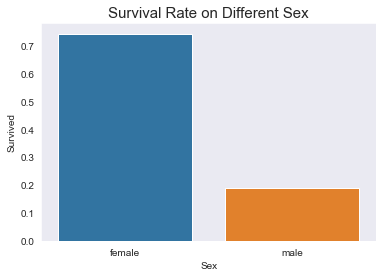

In [15]:
#investigate the survival rate of different Sex 

sex_surv = titanic_train[['Sex','Survived']].groupby('Sex', as_index=False).mean()
display(sex_surv)

sns.barplot(data=sex_surv, x='Sex', y='Survived')
plt.title('Survival Rate on Different Sex', fontsize=15)
plt.show()

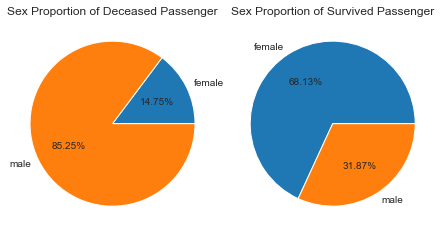

In [16]:
#using pie chart to visualized the percentage of survival on different sex

pie_0 = titanic_train[['Sex','Survived']][titanic_train['Survived']==0].value_counts(subset='Sex').reset_index()
pie_0 = pd.DataFrame(pie_0).rename(columns={0:'Counts'})
pie_0.sort_values('Sex', ascending=True, inplace=True)

pie_1 = titanic_train[['Sex','Survived']][titanic_train['Survived']==1].value_counts(subset='Sex').reset_index()
pie_1 = pd.DataFrame(pie_1).rename(columns={0:'Counts'})
pie_1.sort_values('Sex', ascending=True, inplace=True)


#create subplots for pie chart

fig, ax = plt.subplots(1,2)

# plot pie chart for survived = 0
ax[0].pie(pie_0['Counts'], labels=pie_0['Sex'],autopct='%0.2f%%', shadow=False)
ax[0].title.set_text('Sex Proportion of Deceased Passenger')

# plot pie chart for survived = 1
ax[1].pie(pie_1['Counts'], labels=pie_1['Sex'],autopct='%0.2f%%', shadow=False)
ax[1].title.set_text('Sex Proportion of Survived Passenger')

fig.tight_layout(pad=0.0)
plt.show()

From the visualization above, we can observe that 'Sex' can be one of the important features in our predictive model as it has quite distinct result over its variants.

Next we observe the distribution of age and survivability

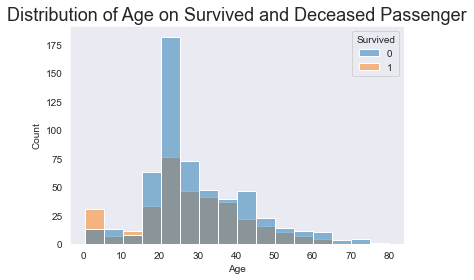

In [17]:
#Observe distribution of age and survavibility

age_surv = titanic_train[['Age','Survived']]

plt.title("Distribution of Age on Survived and Deceased Passenger", fontsize=18)
plot = sns.histplot(data=age_surv, x='Age', hue='Survived', bins=16, alpha=0.5)

In [18]:
#calculating the survival rate of passenger below 15 years 

print('Survival Rate of Passenger below 15 years is ' + str(age_surv[age_surv['Age']<=15]['Survived'].mean()) )
print('Survival Rate of Passenger above 15 years is ' + str(age_surv[age_surv['Age']>15]['Survived'].mean()) )

Survival Rate of Passenger below 15 years is 0.5903614457831325
Survival Rate of Passenger above 15 years is 0.3626237623762376


We can observe from the visualisation above that passenger below 15 years have better survival chance than those above. This information might be useful for feature engineering. 

The two visualization above also confirms the hypothesis that Woman and Children have high survival rate.

There are no other general trend for age apart from the explanation above, so we may use it to generate feature and the drop the age column afterward.

Next, we will see the survival chance of different passenger classes

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


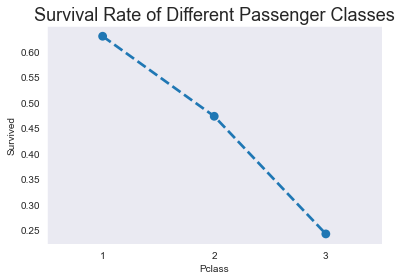

In [19]:
#Observe distribution of age & pclass vs survavibility

pclass_surv = titanic_train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()
display(pclass_surv)

#Point plot to visualize survival rate among different passenger classes 
plt.title("Survival Rate of Different Passenger Classes", fontsize=18)
plot = sns.pointplot(data=pclass_surv, x='Pclass', y='Survived', ci='sd', linestyles='--')

We can see that as Passenger Class increases, the survivability rate decreases, confirming our hypothesis that Passenger Class can be a useful feature in predicting the survivability of passenger.

Next on, let's check on the factor of Fare on survivability of the passenger. As I have assumed before that fare price is affected by Passenger Class and Embarkation Port, I will examine the Fare distribution of survived and deceased passenger based on their passenger class and embarkation port.

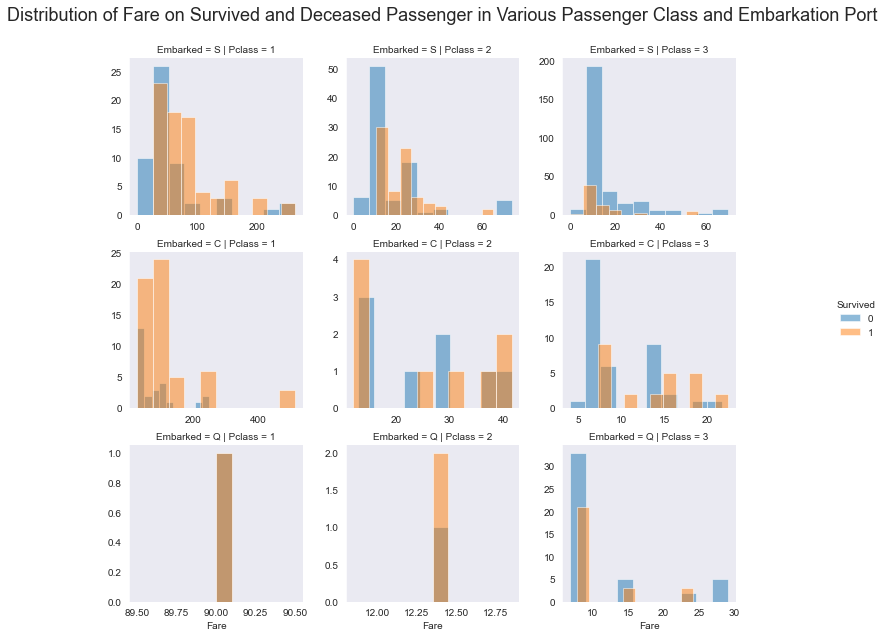

In [20]:
#Observe distribution of fare and survavibility

fare_pclass_embarked_surv = titanic_train[['Fare','Survived','Pclass','Embarked']]

grid = sns.FacetGrid(fare_pclass_embarked_surv, row='Embarked', col='Pclass', hue='Survived', sharex=False, sharey=False)
grid.map(plt.hist, 'Fare', alpha=0.5, bins=10)
grid.fig.suptitle("Distribution of Fare on Survived and Deceased Passenger in Various Passenger Class and Embarkation Port", fontsize=18)
grid.fig.subplots_adjust(top=0.9)
grid.add_legend()

There are several observation from the figure above : 
- In passenger class 1, generally we can say that higher fare price result on better survival chance except for embarkation port Queenstown where too little sample to generate meaningful conclusion.
- For passenger class 2 and 3, the pattern are random as we observe some of the highest paying passenger did not survived.
- Most of the deceased passenger is coming from bottom 10% fare price of each passenger class and embarkation port. We should investigate this by calculating the survival rate of bottom 10% and top 90%.

In [21]:
df = fare_pclass_embarked_surv

for embarked in set(df['Embarked']):
    for pclass in set(df['Pclass']):
    
        print('For Pclass = ' + str(pclass) + ' & Embarked = ' + str(embarked))
        value = df[(df['Embarked']==embarked)&(df['Pclass']==pclass)]['Fare'].quantile(0.10)
        
        print('10% quantile Fare is ' + str(value))
        
        print('Survival Rate for Bottom 10% Fare Price is ' + \
        str( df[(df['Embarked']==embarked)&(df['Pclass']==pclass)&(df['Fare']<value)]['Survived'].mean() ) )
        
        print('Survival Rate for Top 90% Fare Price is ' + \
        str( df[(df['Embarked']==embarked)&(df['Pclass']==pclass)&(df['Fare']>=value)]['Survived'].mean() ) )
        
        print(' ')

For Pclass = 1 & Embarked = Q
10% quantile Fare is 90.0
Survival Rate for Bottom 10% Fare Price is nan
Survival Rate for Top 90% Fare Price is 0.5
 
For Pclass = 2 & Embarked = Q
10% quantile Fare is 12.350000000000001
Survival Rate for Bottom 10% Fare Price is 0.6666666666666666
Survival Rate for Top 90% Fare Price is nan
 
For Pclass = 3 & Embarked = Q
10% quantile Fare is 7.7333
Survival Rate for Bottom 10% Fare Price is 0.0
Survival Rate for Top 90% Fare Price is 0.4153846153846154
 
For Pclass = 1 & Embarked = C
10% quantile Fare is 29.7
Survival Rate for Bottom 10% Fare Price is 0.2857142857142857
Survival Rate for Top 90% Fare Price is 0.7307692307692307
 
For Pclass = 2 & Embarked = C
10% quantile Fare is 13.42502
Survival Rate for Bottom 10% Fare Price is 0.5
Survival Rate for Top 90% Fare Price is 0.5333333333333333
 
For Pclass = 3 & Embarked = C
10% quantile Fare is 7.225
Survival Rate for Bottom 10% Fare Price is 0.0
Survival Rate for Top 90% Fare Price is 0.390625
 
For P

From the calculation above, we saw that generally the top 90% has better survival probability than the bottom 10% except the anomalies in passenger class 2 from embarkation port Cherbourg and Queenstown which may be caused by lack of sufficient amount of data.

The separation by 10% quantile fare made huge different on the survival rate, with some of the bottom 10% even have 0% survival rate. This information is essential and definitely should be considered as one of the feature in the predictive model.

So I will rectify my initial hypothesis which is "Higher ticket fare could lead to higher chance of survival" to "Very low ticket fare correlate to very low chance of survival" because based on the visualisation, higher ticket fare does not necessarily mean higher chance of survival.

The effect of embarkation port to the survival chance will be investigated in the following section. We also know that Female Passenger and Higher Passenger Class had better survival chance, so we're going to analyze the composition of passenger based on sex and passenger class to check if embarkation port did have a correlation to survival.

,index,Embarked
0,S,646
1,C,168
2,Q,77


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


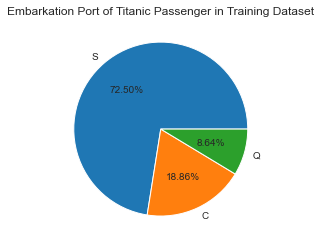

In [22]:
#investigate the effect of embarkation port to the survival chance of passenger 

embarked_surv = titanic_train[['Embarked','Survived','Pclass','Sex']]
embarked_pie = pd.DataFrame(embarked_surv['Embarked'].value_counts())
embarked_pie.reset_index(inplace=True)

display(embarked_pie)
display(embarked_surv.groupby('Embarked', as_index=False)['Survived'].mean())

fig, ax = plt.subplots()
# plot pie chart 
ax.pie(embarked_pie['Embarked'], labels=embarked_pie['index'],autopct='%0.2f%%', shadow=False)
plt.title('Embarkation Port of Titanic Passenger in Training Dataset')
plt.show()

We can see from the pie chart that the majority of the passenger embarked from Southampton. Interestingly, passenger who embarked from Cherbourg had higher survival rate (55.35%) compared to others which is closer to the the average survival rate (38.38%). We should take a look at the composition of the passenger from each embarkation port.

Text(0.5, 1.0, 'Embarkation Port & Pclass Effect on Survival Rate')

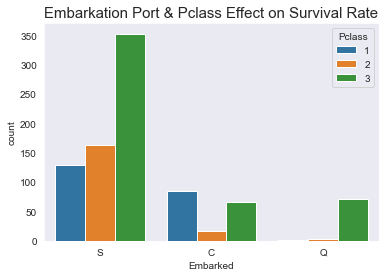

In [23]:
#Count plot for Embarkated & Pclass vs Survival Rate
sns.countplot(x='Embarked', hue='Pclass', data=embarked_surv)
plt.title('Embarkation Port & Pclass Effect on Survival Rate', fontsize=15)

Text(0.5, 1.0, 'Embarkation Port & Sex Effect on Survival Rate')

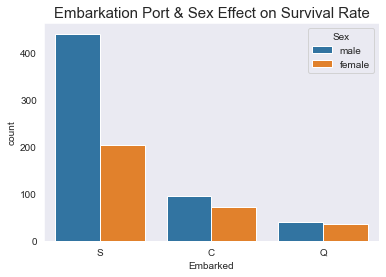

In [24]:
#Barplot for Embarkated & Sex vs Survival Rate
sns.countplot(x='Embarked', hue='Sex',  data=embarked_surv)
plt.title('Embarkation Port & Sex Effect on Survival Rate', fontsize=15)

Notice that the amount of passenger increases from higher to lower passenger class generally except in Cherbourg where the major part of passenger is Passenger Class 1. This may be the factor that skewed its higher survivability rate compared to other embarkation port.

Overall, there are more male passenger except in Queenstown where the proportion of female and male are almost the same. This may be the cause of Queenstown high survival rate despite majority of the passenger are in Passenger Class 3.

Majority passenger embarked from Southampton consist of male and passenger class 3. This fact may correlate to lower than average survival rate for Passenger from Southampton.

Nevertheless, we should further investigate into the data before making any meaningful conclusion.

Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.589147
         2       0.463415
         3       0.189802

Text(0.5, 1.0, 'Survival Rate across different Passenger Class & Embarkation Port')

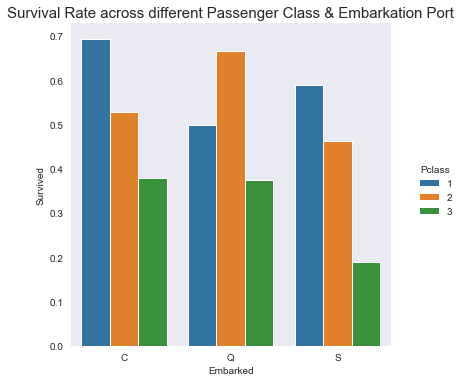

In [25]:
#Survival Rate different Passenger Class & Embarkation Port
emb_pclass_surv = pd.DataFrame(embarked_surv.groupby(['Embarked','Pclass'],as_index=True)['Survived'].mean())
display(emb_pclass_surv)
emb_pclass_surv.reset_index(inplace=True)
sns.catplot(x='Embarked', y='Survived', hue='Pclass', data=emb_pclass_surv, kind='bar')
plt.title('Survival Rate across different Passenger Class & Embarkation Port',fontsize=15)

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.692683
         male    0.174603

Text(0.5, 1.0, 'Survival Rate across different Sex & Embarkation Port')

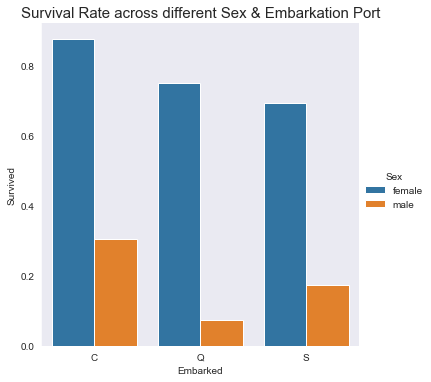

In [26]:
#Survival Rate across Sex & Embarkation Port
emb_sex_surv = pd.DataFrame(embarked_surv.groupby(['Embarked','Sex'],as_index=True)['Survived'].mean())
display(emb_sex_surv)
emb_sex_surv.reset_index(inplace=True)
sns.catplot(x='Embarked', y='Survived', hue='Sex', data=emb_sex_surv, kind='bar')
plt.title('Survival Rate across different Sex & Embarkation Port',fontsize=15)

As we've observed before, the survival rate drop as passenger class number increases except anomaly in Queenstown probably because of insufficient amount of data. 

There is no anomaly observed in combination of Embarkation Port and Sex of Passenger, as expected female passenger generally have higher survival rate.


Another interesting fact is that passenger embarked from Cherbourg have higher survival rate than average survival rate  across all passenger class. While we can't concluded whether embarkation port did have correlation to survival, this fact can be considered as a feature in the predictive model.

Next, we should take a look at the relation between number of Siblings/Spouses and Parents/Children versus the survival of passenger.

,SibSp,Survived,Counts
0,0,0.345395,608
1,1,0.535885,209
2,2,0.464286,28
3,3,0.250000,18
4,4,0.166667,16
5,5,0.000000,7
6,8,0.000000,5


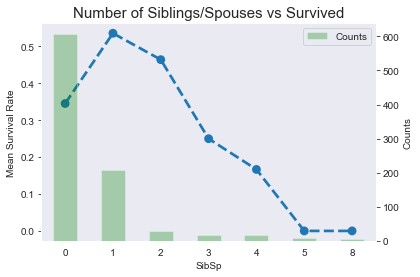

In [27]:
#subset the dataframe to examine the relation between number of Siblings/Spouses vs Survived

sibsp_surv = titanic_train[['SibSp','Survived']].groupby('SibSp', as_index=False)['Survived'].mean()

sibsp_count = pd.DataFrame(titanic_train['SibSp'].value_counts()).reset_index()
sibsp_count.drop(columns='index',inplace=True)
sibsp_count.rename(columns={'SibSp':'Counts'}, inplace=True)

sibsp_surv_concat = pd.concat([sibsp_surv,sibsp_count], axis='columns', ignore_index=False)
display(sibsp_surv_concat)

plt.figure()

ax = sns.pointplot(x='SibSp', y='Survived', data=sibsp_surv_concat, linestyles='--')
ax2 = ax.twinx()
sibsp_surv_concat.plot(x='SibSp', y='Counts', ax=ax2, color="g", kind='bar', alpha=0.3)
ax.set_ylabel('Mean Survival Rate')
ax2.set_ylabel('Counts')
plt.title('Number of Siblings/Spouses vs Survived', fontsize=15)
plt.show()

,Parch,Survived,Counts
0,0,0.343658,678
1,1,0.550847,118
2,2,0.500000,80
3,3,0.600000,5
4,4,0.000000,5
5,5,0.200000,4
6,6,0.000000,1


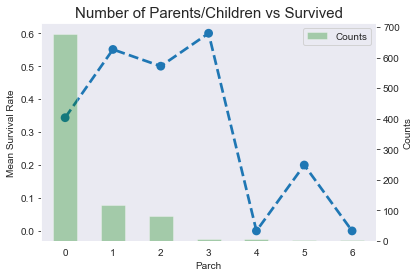

In [28]:
#subset the dataframe to examine the relation between number of Parents/Children vs Survived

parch_surv = titanic_train[['Parch','Survived']].groupby('Parch', as_index=False)['Survived'].mean()

parch_count = pd.DataFrame(titanic_train['Parch'].value_counts()).reset_index()
parch_count.drop(columns='index',inplace=True)
parch_count.rename(columns={'Parch':'Counts'}, inplace=True)

parch_surv_concat = pd.concat([parch_surv,parch_count], axis='columns', ignore_index=False)
display(parch_surv_concat)

plt.figure()
ax = sns.pointplot(x='Parch', y='Survived', data=parch_surv_concat, linestyles='--')
ax2 = ax.twinx()
parch_surv_concat.plot(x='Parch', y='Counts', ax=ax2, color="g", kind='bar', alpha=0.3)
ax.set_ylabel('Mean Survival Rate')
ax2.set_ylabel('Counts')
plt.title('Number of Parents/Children vs Survived', fontsize=15)
plt.show()

There are no general trend that can be observed from the number of Siblings/Spouses or Parents/Children to the number of survival. However, notice that majority of the passenger have at most 2 Siblings/Spouses and 2 Parents/Children, which can be a cut-off point and treating other data as outliers. Also there are a lot of the passenger travels alone.

We may further inspect the relation by using "companion" which is the sum of number of Siblings/Spouses and Parents/Children. 

In [29]:
#Inspect the 'companion' aspect on the survivability of passenger

companion = titanic_train[['SibSp','Parch','Pclass','Fare','Survived']].copy()
companion['comp'] = (companion['SibSp'] + companion['Parch'])

display(companion.head())
display(companion.info())

,SibSp,Parch,Pclass,Fare,Survived,comp
0,1,0,3,7.2500,0,1
1,1,0,1,71.2833,1,1
2,0,0,3,7.9250,1,0
3,1,0,1,53.1000,1,1
4,0,0,3,8.0500,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SibSp     891 non-null    int64  
 1   Parch     891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
 5   comp      891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


None

,comp,Survived,Counts
0,0,0.303538,537
1,1,0.552795,161
2,2,0.578431,102
3,3,0.724138,29
4,4,0.200000,22
5,5,0.136364,15
6,6,0.333333,12
7,7,0.000000,7
8,10,0.000000,6


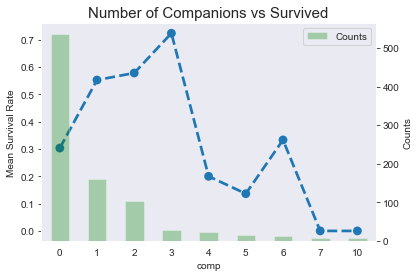

In [30]:
#subset the dataframe to examine the relation between number of Companions vs Survived

comp_surv = companion[['comp','Survived']].groupby('comp', as_index=False)['Survived'].mean()

comp_count = pd.DataFrame(companion['comp'].value_counts()).reset_index()
comp_count.drop(columns='index',inplace=True)
comp_count.rename(columns={'comp':'Counts'}, inplace=True)

comp_surv_concat = pd.concat([comp_surv,comp_count], axis='columns', ignore_index=False)
display(comp_surv_concat)

plt.figure()
ax = sns.pointplot(x='comp', y='Survived', data=comp_surv_concat, linestyles='--')
ax2 = ax.twinx()
comp_surv_concat.plot(x='comp', y='Counts', ax=ax2, color="g", kind='bar', alpha=0.3)
ax.set_ylabel('Mean Survival Rate')
ax2.set_ylabel('Counts')
plt.title('Number of Companions vs Survived', fontsize=15)
plt.show()

In [31]:
#calculate the mean survival rate of passenger with 4 or more companions

print('Mean urvival rate of passenger with 4 or more companions is ' \
      + str(comp_surv_concat[comp_surv_concat['comp']>=4]['Survived'].mean()))

Mean urvival rate of passenger with 4 or more companions is 0.13393939393939394


For passenger with 3 or less companion, we can see that there are a general trend that mean survival rate increases as the number of companions increases and the sum already accounts for more than 90% of the sample which I can say it good enough to represent the general trend. 

I also group the passenger who travel with 4 or more companion into one category and they have lower survival rate compare to passenger who travels alone. We can use this number of companions as one of the ordinal feature as follow :
- passenger with 4 or more companions (group '0')
- passenger with 0 companion (group '1')
- passenger with 1 companion (group '2')
- passenger with 2 companions (group '3') 
- passenger with 3 companions (group '4')

Next, investigate the relation between ticket number and name vs survival

In [32]:
#Investigate the relation between Ticket Number and Survival

unique_ticket = set(titanic_train['Ticket'])
display(len(unique_ticket))

ticket_surv = titanic_train[['Ticket','Survived']].groupby('Ticket', as_index=False)['Survived'].mean()

ticket_count = pd.DataFrame(titanic_train['Ticket'].value_counts()).reset_index()
ticket_count.drop(columns='index',inplace=True)
ticket_count.rename(columns={'Ticket':'Counts'}, inplace=True)

ticket_surv_concat = pd.concat([ticket_surv,ticket_count], axis='columns', ignore_index=False)
display(ticket_surv_concat.head(20))

681

,Ticket,Survived,Counts
0,110152,1.000000,7
1,110413,0.666667,7
2,110465,0.000000,7
3,110564,1.000000,6
4,110813,1.000000,6
5,111240,0.000000,6
6,111320,0.000000,5
7,111361,1.000000,5
8,111369,1.000000,4
9,111426,1.000000,4


In [33]:
#Investigate the relation between Ticket Number and Survival

unique_name = set(titanic_train['Name'])
display(len(unique_name))

891

There is no discoverable pattern in ticket number as it has 681 unique ticket number, it will not be relevant for predictive model. Therefore, 'Ticket' column will be dropped from training dataset. Same thing apply to 'Name' and 'PassengerId' column as well as I see no extractable feature useful for the predictive model. However, I will keep the 'PassengerId' column as it is needed for submission.

Conclusion : 
- Drop 'Name', 'Ticket'
- Add Feature 'Child' for 'Age' under 15 years
- Add Feature 'Bot10' for bottom 10% quantile 'Fare' from each 'Pclass' & 'Embarked'
- Add Feature 'Comp' from 'SibSp' + 'Parch', then drop the original feature 
- Keep 'PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'

# Feature Selection & Engineering 

In this section, I will use the information we got from EDA to further prepare the dataset before fit it to the machine learning algorithm.

I will have to drop the 'Name' and 'Ticket' column first as we don't see any usable feature from those columns.

In [34]:
#drop 'name' and 'ticket' columns in training dataset

print('Columns in training dataset before dropping')
display(titanic_train.columns)

titanic_train.drop(columns=['Name','Ticket'], inplace = True)

print('Columns in training dataset after dropping')
display(titanic_train.columns)

Columns in training dataset before dropping


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Columns in training dataset after dropping


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [35]:
#drop 'name' and 'ticket' columns in test dataset

print('Columns in test dataset before dropping')
display(titanic_test.columns)

titanic_test.drop(columns=['Name','Ticket'], inplace = True)

print('Columns in test dataset after dropping')
display(titanic_test.columns)

Columns in test dataset before dropping


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Columns in test dataset after dropping


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Next is to add new feature 'Child', 'Bot10' and 'Comp'

In [36]:
#Add feature 'Child' for 'Age' <= 15

#for training dataset
titanic_train.loc[titanic_train['Age']<=15, 'Child'] = 1
titanic_train.loc[titanic_train['Age']>15, 'Child'] = 0

#for test dataset
titanic_test.loc[titanic_test['Age']<=15, 'Child'] = 1
titanic_test.loc[titanic_test['Age']>15, 'Child'] = 0

In [37]:
#Add feature 'Bot10' for bottom 10% quantile 'Fare' for each 'Pclass' & 'Embarked'

for embarked in set(titanic_train['Embarked']):
    for pclass in set(titanic_train['Pclass']):
        
        bot10 = titanic_train[(titanic_train['Embarked']==embarked)&(titanic_train['Pclass']==pclass)]['Fare'].quantile(0.10)
        
        #for training dataset
        titanic_train.loc[(titanic_train['Embarked']==embarked)&(titanic_train['Pclass']==pclass)\
        &(titanic_train['Fare']<bot10), 'Bot10'] = 1
        
        titanic_train.loc[(titanic_train['Embarked']==embarked)&(titanic_train['Pclass']==pclass)\
        &(titanic_train['Fare']>=bot10), 'Bot10'] = 0
        
        #for test dataset
        titanic_test.loc[(titanic_test['Embarked']==embarked)&(titanic_test['Pclass']==pclass)\
        &(titanic_test['Fare']<bot10), 'Bot10'] = 1
        
        titanic_test.loc[(titanic_test['Embarked']==embarked)&(titanic_test['Pclass']==pclass)\
        &(titanic_test['Fare']>=bot10), 'Bot10'] = 0

In [38]:
#Add feature 'Comp' 

titanic_train.loc[:,'Comp'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_test.loc[:,'Comp'] = titanic_test['SibSp'] + titanic_test['Parch']

#Recategorize 'Comp' into ordinal feature
#for training dataset
titanic_train.loc[titanic_train['Comp']>=4, 'Comp'] = 0
titanic_train['Comp'] = titanic_train['Comp'].map({0:1, 1:2, 2:3, 3:4})

#for test dataset
titanic_test.loc[titanic_test['Comp']>=4, 'Comp'] = 0
titanic_test['Comp'] = titanic_test['Comp'].map({0:1, 1:2, 2:3, 3:4})

#Check if the result is as intended
display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Bot10,Comp
0,1,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,2
1,2,1,1,female,38.0,1,0,71.2833,C,0.0,0.0,2
2,3,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,2
4,5,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,Bot10,Comp
0,892,3,male,34.5,0,0,7.8292,Q,0.0,0.0,1
1,893,3,female,47.0,1,0,7.0000,S,0.0,1.0,2
2,894,2,male,62.0,0,0,9.6875,Q,0.0,1.0,1
3,895,3,male,27.0,0,0,8.6625,S,0.0,0.0,1
4,896,3,female,22.0,1,1,12.2875,S,0.0,0.0,3


In [39]:
#Drop 'SibSp' & 'Parch'
titanic_train.drop(columns=['SibSp','Parch'], inplace=True)
titanic_test.drop(columns=['SibSp','Parch'], inplace=True)

I need to transform some of the remaining feature into numerical form as the machine learning models I am going to use will not process the non-numeric data. That includes 'Sex' and 'Embarked' column. 

There are many techniques can be used to encode non-numerical data into numerical data, such as simply changing the label into numerical data such as '0','1', etc. The method works well in binary data, but may cause confusion on machine learning models as it may intepret them as ordinal data rather than nominal when there is more than 2 category. Another way to encode is to create dummy features which return '1' to its dummy and '0' to other dummies.

In [40]:
#Map 'Sex' column into numerical data

titanic_train['Sex'] = titanic_train['Sex'].map({'male':0, 'female':1})
titanic_test['Sex'] = titanic_test['Sex'].map({'male':0, 'female':1})

In [41]:
#Create Dummy Feature for 'Embarked' column

dummy_train = pd.get_dummies(titanic_train['Embarked'], prefix='Embarked', drop_first=True)
dummy_test = pd.get_dummies(titanic_test['Embarked'], prefix='Embarked', drop_first=True)

#Concatenate original dataset with the dummy dataset

titanic_train = pd.concat([titanic_train,dummy_train], axis='columns', ignore_index=False)
titanic_test = pd.concat([titanic_test,dummy_test], axis='columns', ignore_index=False)

#Drop 'Embarked' column as it has been 
titanic_train.drop(columns='Embarked', inplace=True)
titanic_test.drop(columns='Embarked', inplace=True)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,7.2500,S,0.0,0.0,2,0,1
1,2,1,1,1,38.0,71.2833,C,0.0,0.0,2,0,0
2,3,1,3,1,26.0,7.9250,S,0.0,0.0,1,0,1
3,4,1,1,1,35.0,53.1000,S,0.0,0.0,2,0,1
4,5,0,3,0,35.0,8.0500,S,0.0,0.0,1,0,1


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,892,3,0,34.5,7.8292,Q,0.0,0.0,1,1,0
1,893,3,1,47.0,7.0000,S,0.0,1.0,2,0,1
2,894,2,0,62.0,9.6875,Q,0.0,1.0,1,1,0
3,895,3,0,27.0,8.6625,S,0.0,0.0,1,0,1
4,896,3,1,22.0,12.2875,S,0.0,0.0,3,0,1


In [43]:
#Check if the result is as intended
display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Sex,Age,Fare,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,7.2500,0.0,0.0,2,0,1
1,2,1,1,1,38.0,71.2833,0.0,0.0,2,0,0
2,3,1,3,1,26.0,7.9250,0.0,0.0,1,0,1
3,4,1,1,1,35.0,53.1000,0.0,0.0,2,0,1
4,5,0,3,0,35.0,8.0500,0.0,0.0,1,0,1


,PassengerId,Pclass,Sex,Age,Fare,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,892,3,0,34.5,7.8292,0.0,0.0,1,1,0
1,893,3,1,47.0,7.0000,0.0,1.0,2,0,1
2,894,2,0,62.0,9.6875,0.0,1.0,1,1,0
3,895,3,0,27.0,8.6625,0.0,0.0,1,0,1
4,896,3,1,22.0,12.2875,0.0,0.0,3,0,1


We have created dummy features for 'Embarked'. Notice that the drop_first customisation is set as True to avoid multicolinearity and reduce the dimensionality of the features. You can read more about dummy variable, multicolinearity and dimensionality 
<a href="https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a">here</a>

You may notice that the 'Age' and 'Fare' is relatively bigger than the other feature which may cause problem in weight and sensitivity problems in the mathematical operation. It needs to be scaled before we fit the data into the machine learning models

In [45]:
#Import MinMaxScaler from sklearn library 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

titanic_train[['Age','Fare']] = scaler.fit_transform(titanic_train[['Age','Fare']])
titanic_test[['Age','Fare']] = scaler.fit_transform(titanic_test[['Age','Fare']])

display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Sex,Age,Fare,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,1,0,3,0,0.271174,0.014151,0.0,0.0,2,0,1
1,2,1,1,1,0.472229,0.139136,0.0,0.0,2,0,0
2,3,1,3,1,0.321438,0.015469,0.0,0.0,1,0,1
3,4,1,1,1,0.434531,0.103644,0.0,0.0,2,0,1
4,5,0,3,0,0.434531,0.015713,0.0,0.0,1,0,1


,PassengerId,Pclass,Sex,Age,Fare,Child,Bot10,Comp,Embarked_Q,Embarked_S
0,892,3,0,0.452723,0.015282,0.0,0.0,1,1,0
1,893,3,1,0.617566,0.013663,0.0,1.0,2,0,1
2,894,2,0,0.815377,0.018909,0.0,1.0,1,1,0
3,895,3,0,0.353818,0.016908,0.0,0.0,1,0,1
4,896,3,1,0.287881,0.023984,0.0,0.0,3,0,1


The datasets are ready to be used in machine learning models.

# Fit and Train Machine Learning Models

In [46]:
#import machine learning library 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

I will split the training dataset in order the check the accuracy of each machine learning models before using the model to predict the outcome of test dataset

In [55]:
#define features that will be used in ML models

features = list(titanic_train.columns.drop(['PassengerId', 'Survived']))

#Split The Training Model 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_train[features], titanic_train['Survived'], \
test_size = 0.2, random_state=14)

In [64]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

acc_score = accuracy_score()
score = acc_score(y_true==y_test,y_pred==pred)
acc_score

TypeError: accuracy_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree